`You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following:`

- (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

- (2) After removing outliers in step 1, you get a new dataframe.

- (3) On step(2) dataframe, use 4 standard deviation to remove outliers

- (4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

- (5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

importing the required libraries

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

Loading the Dataset

In [2]:
df = pd.read_csv("./DATASETS/bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Removing the outliers using the Percentile method

In [3]:
min_thresold, max_thresold = df["price"].quantile([0.001, 0.999])
print(min_thresold, max_thresold)

11.5 2000.0


In [4]:
df2 = df[(df["price"] > min_thresold) & (df["price"] < max_thresold)]
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5216,other,2 Bedroom,2800.0,2.0,650.00,2,23214
12577,Hosa Road,1 BHK,615.0,1.0,43.08,1,7004
8542,other,3 BHK,1400.0,3.0,90.00,3,6428
120,Hebbal,4 BHK,5611.5,4.0,477.00,4,8500
292,Jakkur,2 BHK,1417.0,2.0,75.00,2,5292


**outlier detection and removal using the 4 standard deviation methode**

In [5]:
upper_limit = df2.price.mean() + 4*df.price.std()
lower_limit = df2.price.mean() - 4*df.price.std()
print(lower_limit, upper_limit)

-486.99241984975356 706.4155415750174


In [6]:
df3 = df[(df.price > lower_limit) & (df.price < upper_limit)]
df3.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11481,other,2 BHK,1100.0,2.0,75.00,2,6818
12737,Green Glen Layout,3 BHK,1717.0,3.0,125.00,3,7280
10560,Sonnenahalli,3 BHK,1415.0,2.0,65.00,3,4593
9215,other,3 BHK,1500.0,3.0,67.49,3,4499
4155,Yelahanka,3 BHK,1275.0,2.0,95.00,3,7450


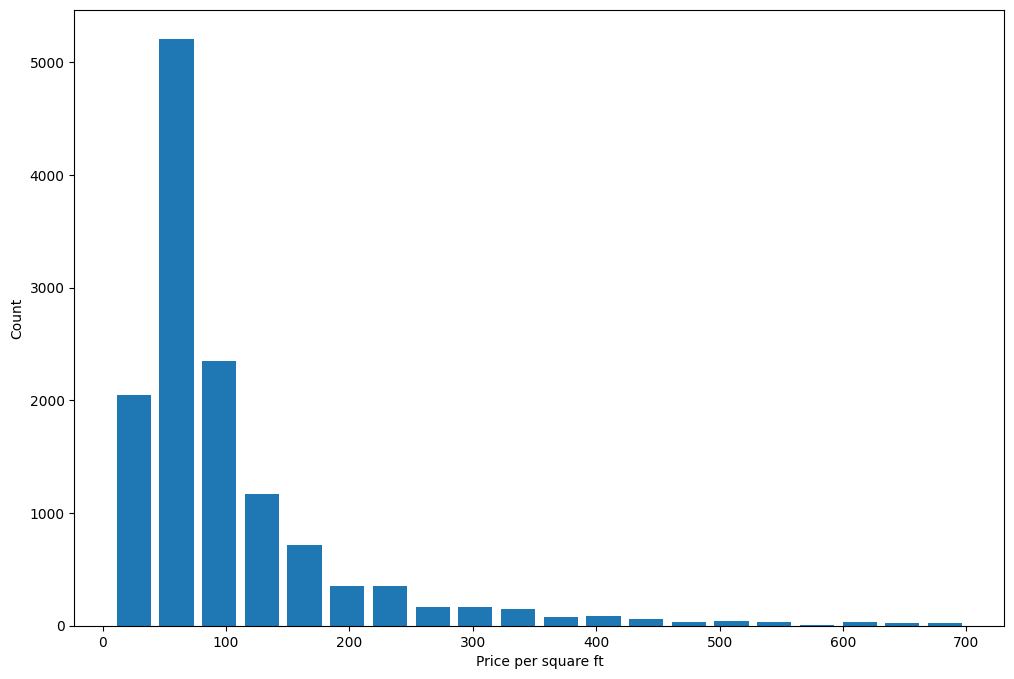

In [8]:
plt.hist(df3.price, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

`plotting the bell curve on the histogram`

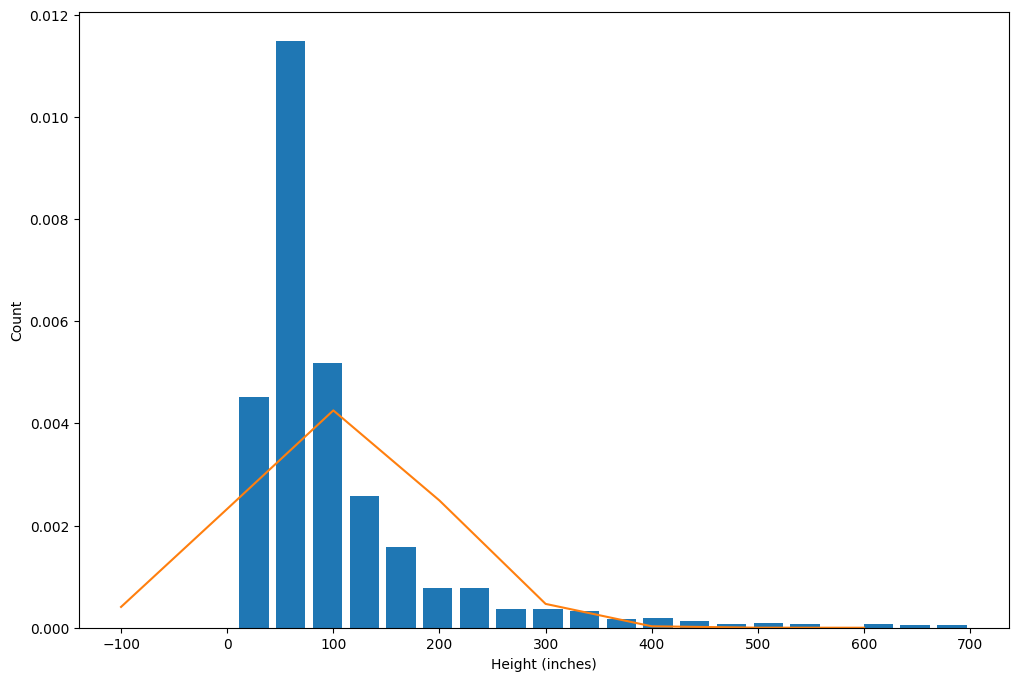

In [16]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-100, df3.price.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price.mean(),df3.price.std()))

plt.show()

`Now remove outliers using z score. Use z score of 4 as your thresold`

In [17]:
df2["zscore"] = (df.price - df.price.mean()) / df.price.std()
df2.sample(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13340\3833572330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["zscore"] = (df.price - df.price.mean()) / df.price.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4867,Basavangudi,2 BHK,1560.0,2.0,145.0,2,9294,0.219364
1097,Haralur Road,2 BHK,1243.0,2.0,46.0,2,3700,-0.444282
10262,Yelahanka,3 BHK,1847.0,3.0,92.0,3,4981,-0.135921
5001,Kanakpura Road,2 BHK,700.0,2.0,40.0,2,5714,-0.484503
1856,Sector 2 HSR Layout,3 BHK,1450.0,2.0,135.0,3,9310,0.152329
1170,Sarjapur Road,4 BHK,3335.0,5.0,300.0,4,8995,1.258405
4556,Whitefield,4 Bedroom,4356.0,5.0,850.0,4,19513,4.945325
12942,CV Raman Nagar,5 Bedroom,1200.0,2.0,100.0,5,8333,-0.082293
9050,other,3 Bedroom,1500.0,3.0,90.0,3,6000,-0.149328
9551,Uttarahalli,2 BHK,1065.0,2.0,42.6,2,4000,-0.467074


In [ ]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(92, 8)

In [21]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9636,other,4 Bedroom,2100.0,3.0,1000.0,4,47619,5.950849
12868,other,6 Bedroom,30400.0,4.0,1824.0,6,6000,11.474526
10745,Mahalakshmi Layout,8 Bedroom,4482.0,6.0,852.0,8,19009,4.958732
8589,other,4 Bedroom,8400.0,5.0,1675.0,4,19940,10.475706
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000,8.632246


In [22]:
df4 = df2[(df2.zscore < -4) & (df2.zscore>4)]
df4.shape

(0, 8)

In [23]:
df2.shape[0] - df4.shape[0]

13169